In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [75]:
movies=pd.read_csv("aula0/ml-latest-small/movies.csv")
ratings=pd.read_csv("aula0/ml-latest-small/ratings.csv")

In [76]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [78]:
ratings.columns=['usuarioId','filmeId','nota','momento']

In [79]:
ratings.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Análise exploratória inicial dos dados de notas dadas aos filmes:
1. Quais são os valores de notas possíveis no dataframe de Notas (ratings)?
   * Podemos Checar usando o método `.unique()` da biblioteca pandas.
2.  Qual a distribuição dentro de cada valor de nota?
    *  Podemos checar usando o método `.value_counts()` da biblioteca Pandas.
3. Qual a média dessas notas?
   *  Podemos checar usando o método `.mean()` da biblioteca Pandas.

In [80]:
#Quais são os valores de notas possíveis?
ratings['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [81]:
ratings['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [82]:
print("Média:",ratings['nota'].mean())
print("Mediana:",ratings['nota'].median())

Média: 3.501556983616962
Mediana: 3.5


In [83]:
ratings['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Construindo gráficos para observar a distribuição de Notas:
* Utilizando o `.plot()`  da bibliotéca Pandas;
* Utilizando a biblioteca Seaborn para criar o histograma mais visual;
* Utilizando `sns.boxplot()` para visualizar essa distribuição de outra forma.

<AxesSubplot:ylabel='Frequency'>

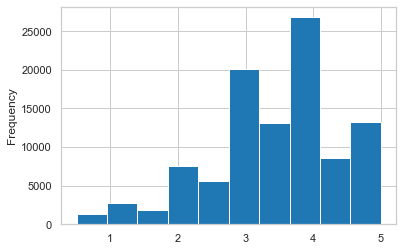

In [84]:
#Verificando a distribuição de notas por meio de um Histograma:
ratings['nota'].plot(kind='hist')

In [85]:
#Função para plotar um histograma usando Seaborn:
def seaborn_plot_histogram(df, column, title, xlabel, ylabel, bins=5):
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.histplot(df[column], bins=bins)

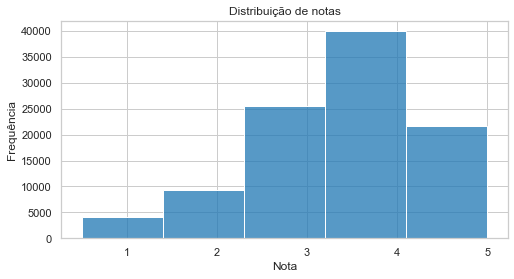

In [86]:
seaborn_plot_histogram(ratings, "nota", "Distribuição de notas", "Nota", "Frequência")

<AxesSubplot:title={'center':'Distribuição de Notas'}, xlabel='Nota'>

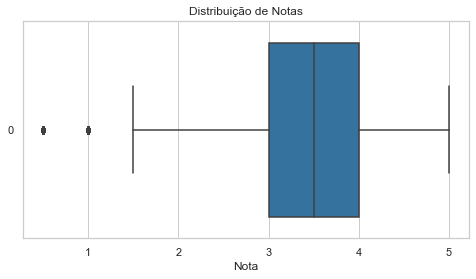

In [87]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Notas")
plt.xlabel("Nota")
sns.boxplot(data=ratings['nota'], orient='h', saturation=0.7)

#### Explorando os dados do arquivo `movies.csv`

In [97]:
movies.columns=['filmeId','titulo','generos']
movies.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


E como fazer se eu quiser olhar as notas de algúm desses filmes, lembrando, que as notas estão em outro `dataframe` chamado `ratings`  

Nesse caso, podemos observar que o indice em comum é o `movieId` presente em ambos os dataframes, podemos então buscar a partir dele:
* Iremos verificar as notas do filme **Toy Story**, que possui `movieId=1`:
  * Para isso usaremos o método `.query()` do pandas para fazer uma *consulta* aos dados

In [101]:
ratings.query("filmeId==1").head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


E se eu quiser ver apenas a média das notas?
* Faremos de duas formas:
  * Usando o método ´.query()´
  * Mais *Pythonist* sem usar nenhum método específico

In [107]:
ratings.query("filmeId==1").nota.mean()

3.9209302325581397

In [112]:
(ratings['nota'][ratings['filmeId']==1]).mean()

3.9209302325581397

Agora o objetivo é **agrupar as notas** baseado no `filmeId` com as **médias de notas** para cada filme:
* Para isso, utilizaremos o método `.groupby()` do Pandas.

In [114]:
medias_por_filme=ratings.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:title={'center':'Distribuição de Médias de Notas por Filme'}, xlabel='Nota', ylabel='Count'>

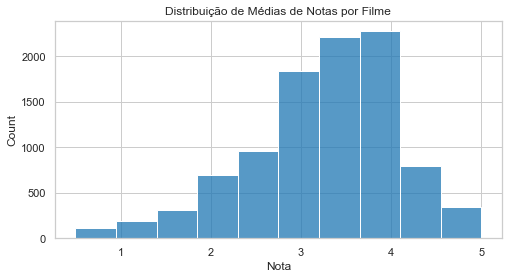

In [120]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Médias de Notas por Filme")
plt.xlabel("Nota")
sns.histplot(data=medias_por_filme, bins=10)

<AxesSubplot:title={'center':'Distribuição de Notas'}, xlabel='nota'>

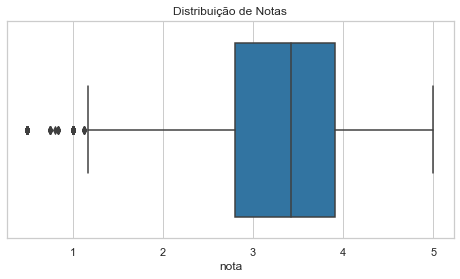

In [131]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Notas")
plt.xlabel("Nota")
sns.boxplot(x=medias_por_filme)

E se agora eu quiser **juntar** a série de *médias de notas* ao meu `DataFrame` de filmes, como uma nova coluna chama `notas_media`:
* Podemos fazer isso, usando o método ` ` da bibliotéca Pandas.